In [1]:
import pandas as pd
import numpy as np
from MultiFactorModel import *

In [2]:
# 设置基本信息
start_date='20170801'
end_date='20200801'
factor_list = ['turnover_ratio','circulating_market_cap','pe_ratio','pb_ratio']

In [3]:
# 获取这段时间每天的factor，存入字典
factor_date_dict = PrepareDataDict.get_factor_date_dict(factor_list,start_date,end_date)

daily_factor time cost 190.73135781288147 s


In [11]:
factor_date_dict

{Timestamp('2017-08-01 00:00:00'):            pe_ratio  turnover_ratio  pb_ratio  circulating_market_cap
 000001.SZ    8.3408          1.2033    1.0243               1867.7461
 000002.SZ   12.3792          0.2158    2.4564               2273.8865
 000008.SZ   41.0197          0.3581    3.4904                152.0906
 000009.SZ   83.4435          5.2214    4.4032                194.8362
 000060.SZ   48.6415          2.5508    3.0876                268.8685
 ...             ...             ...       ...                     ...
 601997.SH    9.4296          5.2002    1.6800                 78.2000
 601998.SH    7.8870          0.2336    0.9632               2150.4082
 603160.SH   43.5870          1.7852   13.2011                 41.5395
 603858.SH   25.5493          1.1951    3.9188                 47.0522
 603993.SH  104.7159          2.1801    4.1604                913.2380
 
 [300 rows x 4 columns],
 Timestamp('2017-08-02 00:00:00'):            pe_ratio  turnover_ratio  pb_ratio  circu

In [20]:
date = list(factor_date_dict.keys())[-1]
factor_date_dict[date]

,pe_ratio,turnover_ratio,pb_ratio,circulating_market_cap
000001.SZ,8.8362,0.6008,0.9306,2588.7273
000002.SZ,7.9952,0.7548,1.6528,2607.5515
000063.SZ,35.6760,1.8267,4.3791,1361.6823
000066.SZ,68.8343,6.8555,6.9036,455.8013
000069.SZ,4.9086,0.8309,0.9017,504.5438
...,...,...,...,...
603799.SH,167.8822,6.2777,5.2066,461.2399
603833.SH,32.0198,0.2274,6.0645,527.0057
603899.SH,58.7608,0.4088,14.2976,601.4040
603986.SH,148.2462,2.6903,11.3513,922.7435


In [4]:
# 获取研究时间段的需要预测的stock_return，存入字典
stock_return_shift_dict = PrepareDataDict.get_stock_return_shift_dict(start_date, end_date,index_name='000300.SH')

stock_return time cost 467.2848198413849 s


In [21]:
stock_return_shift_dict[date]

,return
000001.SZ,0.018741
000002.SZ,0.016393
000063.SZ,0.008425
000066.SZ,0.100000
000069.SZ,0.040446
...,...
603799.SH,0.012161
603833.SH,-0.004130
603899.SH,-0.011779
603986.SH,0.004536


In [5]:
# 对于factor_date_dict中的因子进行预处理，这里只进行mean_std的极值处理与zscore的标准化处理，
# 并没有进行中性化，想要中性化，可以加入control_factor_dict
preprocess = PreprocessFactor(factor_date_dict,deextreme='mean_std',standard='zscore')
factor_preprocessed_date_dict = preprocess.standardize()

In [22]:
factor_preprocessed_date_dict[date]

,pe_ratio,turnover_ratio,pb_ratio,circulating_market_cap
000001.SZ,-0.425896,-0.607188,-0.675929,1.188617
000002.SZ,-0.435147,-0.508527,-0.555971,1.202834
000063.SZ,-0.130658,0.178191,-0.103130,0.261888
000066.SZ,0.234084,3.399917,0.316191,-0.422280
000069.SZ,-0.469099,-0.459773,-0.680730,-0.385468
...,...,...,...,...
603799.SH,1.323611,3.029746,0.034318,-0.418173
603833.SH,-0.170876,-0.846409,0.176816,-0.368503
603899.SH,0.123275,-0.730194,1.544342,-0.312314
603986.SH,1.107615,0.731460,1.054958,-0.069621


In [6]:
# 计算IC与factor_return,并进行检验
factorTest = FactorTest(factor_preprocessed_date_dict,stock_return_shift_dict)
IC_df,factor_return_df = factorTest.get_IC_factorReturn_df()    
ICIR = factorTest.get_ICIR()
factor_return_test = factorTest.factor_return_test()

In [16]:
IC_df

,pe_ratio,turnover_ratio,pb_ratio,circulating_market_cap
2017-08-01,-0.0316,0.262246,-0.0267056,0.0814291
2017-08-02,0.0687036,0.0477312,-0.0199637,-0.230348
2017-08-03,0.127288,-0.21538,-0.137755,-0.043083
2017-08-04,0.0940068,0.197804,0.144142,-0.0376303
2017-08-07,0.0342588,0.191294,0.0839037,-0.0799568
...,...,...,...,...
2020-07-27,-0.0201215,0.0482884,0.17743,0.0302028
2020-07-28,0.197471,0.261535,0.274566,-0.0633793
2020-07-29,-0.0375924,0.0945677,0.0369779,-0.0245057
2020-07-30,0.205474,0.319881,0.221404,-0.0265277


In [17]:
factor_return_df

,pe_ratio,turnover_ratio,pb_ratio,circulating_market_cap
2017-08-01,-1.581429,13.124153,-1.336486,4.075139
2017-08-02,3.945660,2.741216,-1.146518,-13.228951
2017-08-03,6.133111,-10.377674,-6.637439,-2.075867
2017-08-04,5.122604,10.778704,7.854548,-2.050547
2017-08-07,1.818693,10.155222,4.454189,-4.244660
...,...,...,...,...
2020-07-27,-0.906093,2.174482,7.989890,1.360066
2020-07-28,3.938807,5.216642,5.476565,-1.264179
2020-07-29,-1.685743,4.240670,1.658187,-1.098903
2020-07-30,8.183833,12.740587,8.818310,-1.056574


In [18]:
factor_return_test

,pe_ratio,turnover_ratio,pb_ratio,circulating_market_cap
t_value,2.393709,-0.439172,3.729970,0.283661
p_value,0.016930,0.660667,0.000206,0.776750
ADF_value,0.000000,0.000000,0.000000,0.000000
positive_ratio,0.544460,0.496580,0.573187,0.506156


In [7]:
# 获取每天factor_return的预测值（用shift_days天之前的factor_return通过MA的形式）
factor_return_pred_dict = factorTest.get_factor_return_pred_dict()

In [23]:
factor_return_pred_dict[date]

pe_ratio                  1.958313
turnover_ratio            0.927136
pb_ratio                  4.224924
circulating_market_cap   -0.480447
Name: 2020-07-31 00:00:00, dtype: float64

In [8]:
# 分组回测，并计算策略的净值
nev_df,retadd1_df = get_nev_groupbt(factor_preprocessed_date_dict,factor_return_pred_dict,stock_return_shift_dict)

In [9]:
# 计算策略的相关评价指标
res_df = get_backtest_indicator(nev_df)

In [24]:
res_df

,Backtest Result
annual_return,0.170340
annual_volatility,0.232207
sharp_ratio,0.733569
drawdown(ratio)%,44.772204


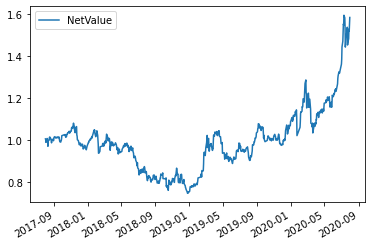

In [10]:
nev_df.plot()